In [1]:
import pandas as pd

In [2]:
# importing data
multi_advertising = pd.read_csv("Advertising.csv")
multi_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# looking at last five rows
multi_advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
# Information stored in the csv

multi_advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
# for satistical information
multi_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<h4>step 2: Visualization </h4>

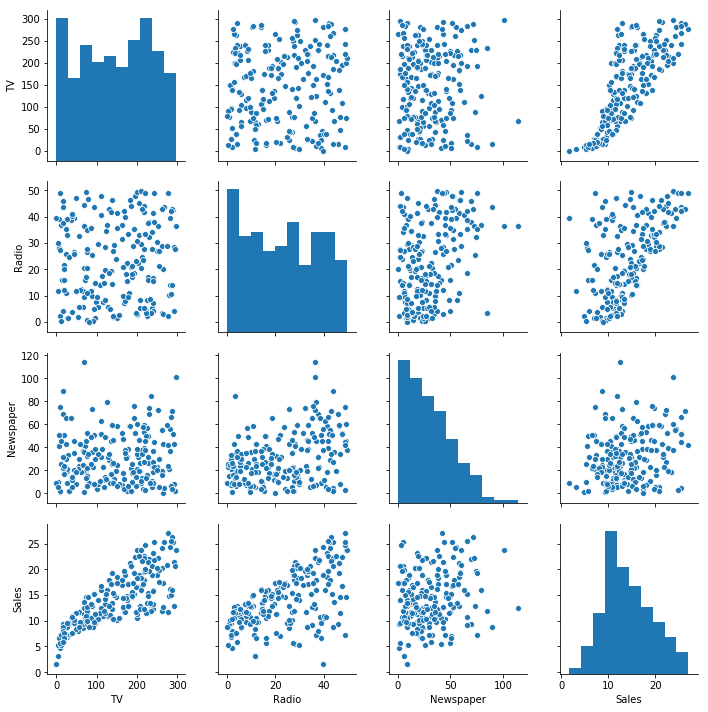

In [6]:
# visulaization on the data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(multi_advertising)

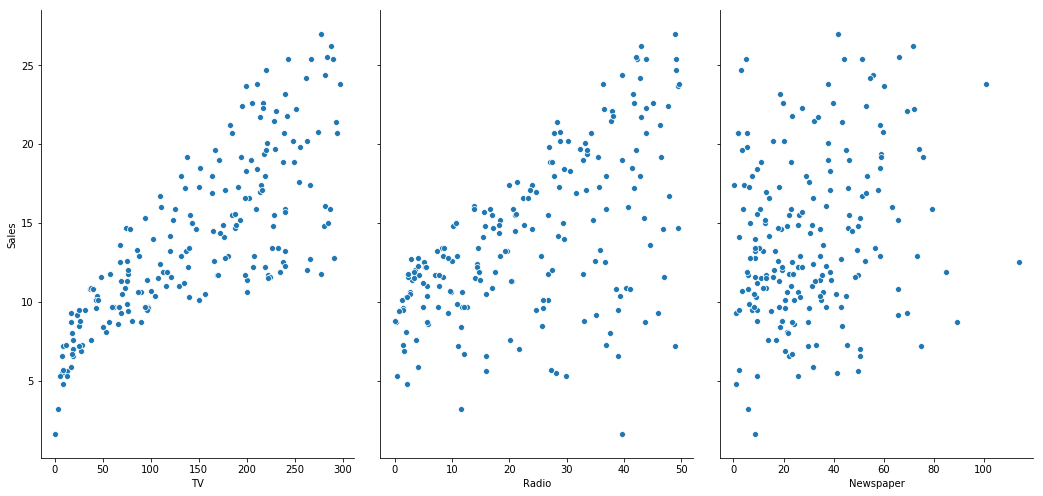

In [7]:
sns.pairplot(multi_advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7,kind='scatter')

<h4>step 3: Splitting data for training and testing </h4>

In [8]:
# assigning independent or feature varibales to x
x = multi_advertising[['TV','Radio','Newspaper']]

# assigning dependent variable to y

y = multi_advertising['Sales']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=100)

/home/kiran/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<h4>Step 4 : Performing Linear Regression</h4>

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#  create the linear regression
#  fit the model to the training data0
mlr = LinearRegression()
mlr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h4> step: 5 Model Evaluation</h4>

In [12]:
# print the intercept
print(mlr.intercept_)

2.652789668879498


In [13]:
# Lets see the coefficient
print(mlr.coef_)
coeff_df = pd.DataFrame(mlr.coef_,X_test.columns, columns=['Coefficient'])
coeff_df

[0.0454256  0.18975773 0.00460308]


,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [14]:
# if we increase marketing in 1 unit for tv over all sales will 
# increase by 0.045426



<h4> step 6 predictions

In [15]:
y_pred = mlr.predict(X_test)

<h4> step 7 Calaculate Error terms</h4>

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print('Mean squared error: ',mse)
print('r_squared : ',r_squared)

Mean squared error:  1.8506819941636938
r_squared :  0.9058622107532247


<h4>Optional step" Check for P_Value using STATSMODELS</h4>

In [17]:
import statsmodels.api as sm
X_train_sm = X_train

# unlike SKLearn statsmodels dont automatically fit a constant,
# so you need to use the method sm.add_constant(X) in order to add a 
# constant
X_train_sm = sm.add_constant(X_train_sm)
# Creat afitted model in oline
mlr_sm = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
mlr_sm.params

/home/kiran/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [18]:
print(mlr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 17 May 2020   Prob (F-statistic):           9.97e-66
Time:                        00:04:35   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

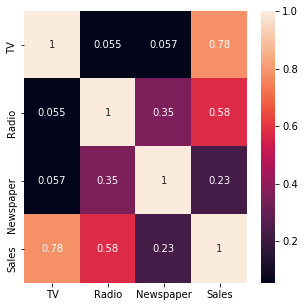

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (5,5))
sns.heatmap(multi_advertising.corr(),annot =True)

<h4>step: 8 Implementing the results and running the model again</h4>

In [20]:
# Remove newspaper from the our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [21]:
# model building
mlr.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# making predictions
y_Pred_new = mlr.predict(X_test_new)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse_new = mean_squared_error(y_test,y_Pred_new)
r_squared_new = r2_score(y_test,y_Pred_new)
print('Mean squared error: ',mse_new)
print('r_squared : ',r_squared_new)

Mean squared error:  1.7847400520902816
r_squared :  0.9092164491718219


Text(0, 0.5, 'sales')

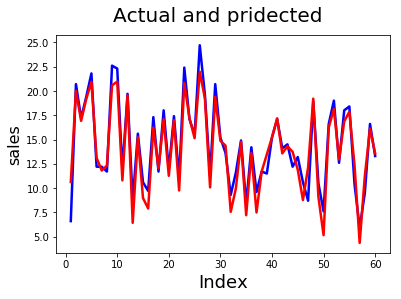

In [24]:
# Actual vs predicted

import matplotlib.pyplot as plt

c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test,color = "blue",linewidth = 2.5,linestyle="-")
plt.plot(c,y_pred,color = "red",linewidth = 2.5,linestyle="-")
fig.suptitle('Actual and pridected', fontsize=20) # plot heading
plt.xlabel('Index',fontsize=18) # plot x label
plt.ylabel('sales',fontsize=16) # plot y label

Text(0, 0.5, 'y_test-y_pred')

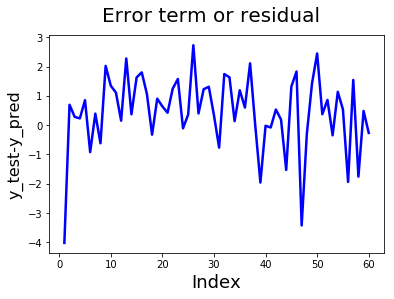

In [25]:
# Error term or residual
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred,color = "blue",linewidth = 2.5,linestyle="-")
fig.suptitle('Error term or residual', fontsize=20) # plot heading
plt.xlabel('Index',fontsize=18) # plot x label
plt.ylabel('y_test-y_pred',fontsize=16) # plot y label

In [26]:
X_train_final = X_train_new

# unlike SKLearn statsmodels dont automatically fit a constant,
# so you need to use the method sm.add_constant(X) in order to add a 
# constant
X_train_final = sm.add_constant(X_train_new)
# Creat afitted model in oline
mlr_sm = sm.OLS(y_train,X_train_final).fit()

# print the coefficients
mlr_sm.params

/home/kiran/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64

In [27]:
print(mlr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 17 May 2020   Prob (F-statistic):           4.46e-67
Time:                        00:04:35   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

<h4>Model Refinement using Recursive feature Elimination</h4>

In [28]:
from sklearn.feature_selection import RFE


In [29]:
rfe = RFE(mlr,2)
rfe = rfe.fit(X_train,y_train)

In [30]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]
